# 1 - Regularized Linear Regression

In [1]:
import numpy as np
import scipy.io

In [4]:
data = scipy.io.loadmat('ex5data1.mat')

## 1.1 - Visualizing Dataset

In [243]:
X_train_1 = data['X']
y_train = data['y']
X_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

In [7]:
X.shape

(12, 1)

In [8]:
y.shape

(12, 1)

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Water flowing out of the dam')

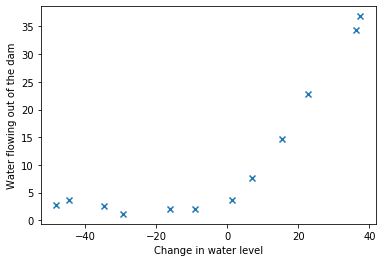

In [25]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, marker='x')
ax.set_xlabel('Change in water level')
ax.set_ylabel('Water flowing out of the dam')

## 1.2 - Regularized Linear Regression

In [324]:
class LinearRegression():
    def __init__(self):
        print("Initialized Linear Model")
    
    def __add_bias(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.c_[ones, X]
    
    def __loss(self, h, y):
        reg = (self.lam / (2 * y.shape[0])) * (self.theta[1:] ** 2).sum()
        return (1 / (2 * y.shape[0])) * ((h - y) ** 2).sum() + reg
    
    def __cost(self, h, y):
        return (1 / (2 * y.shape[0])) * ((h - y) ** 2).sum()
    
    def fit(self, X, y, alpha=0.001, lam=1, epochs=1000):
        X = self.__add_bias(X)
        self.lam = lam
        self.theta = np.zeros((X.shape[1], 1))
        self.epochs = epochs
        self.losses=[]
        gradient = np.zeros((self.theta.shape))
        
        for epoch in range(epochs):
            h = X.dot(self.theta)
            gradient[0] = X[:, 0].T.dot(h - y) / y.shape[0]
            gradient[1:] = (X[:, 1:].T.dot(h - y) / y.shape[0]) + (self.lam / y.shape[0]) * self.theta[1:]
            #gradient = X.T.dot(h - y) / y.shape[0]
            self.theta = self.theta - alpha * gradient
            self.losses.append(self.__loss(h, y))
        return(self.__cost(h, y))
    
    def predict(self, vector):
        vector = self.__add_bias(vector)
        return vector.dot(self.theta)
    
    def score(self, X, y):
        pred = self.predict(X)
        return self.__loss(pred, y)
        

In [325]:
lr_reg = LinearRegression()

Initialized Linear Model


In [193]:
lr_reg.fit(X_train, y_train, lam=0, alpha=0.001, epochs=5000)

22.379008040373307


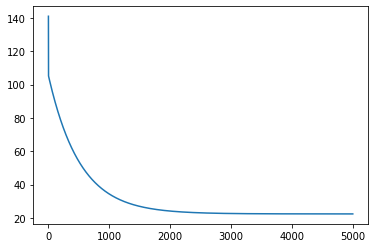

In [194]:
fig, ax = plt.subplots()
ax.plot(range(lr_reg.epochs), lr_reg.losses)

Text(0, 0.5, 'Water flowing out of the dam')

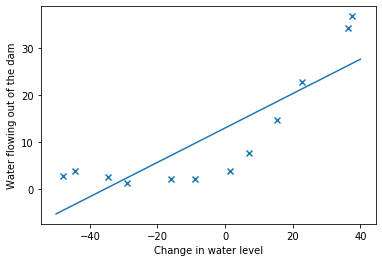

In [195]:
x_pts = np.linspace(-50, 40, 50)
y_pts = lr_reg.theta[0] + lr_reg.theta[1] * x_pts
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, marker='x')
ax.plot(x_pts, y_pts)
ax.set_xlabel('Change in water level')
ax.set_ylabel('Water flowing out of the dam')


In [196]:
lr_reg.score(X_test, y_test)

32.72873144366896

# 2 - Polynomial Regression

In [217]:
from polynomial_features import PolynomialFeatures
from feature_normalizer import MeanNormalizer

In [212]:
poly_features = PolynomialFeatures(n_dimentions=8)

Initialized Polynomial Features with 8 dimentions


In [218]:
mean = MeanNormalizer()

Initialized a Mean Normalizer Model...


In [213]:
X_poly_train = poly_features.transform(X_train, extended=False)

In [219]:
mean.fit(X_poly_train)
X_poly_train = mean.transform(X_poly_train)

In [328]:
pol_reg = LinearRegression()

Initialized Linear Model


In [237]:
pol_reg.fit(X_poly_train, y, alpha=0.01, lam=0, epochs=300)

1.7918780635688383


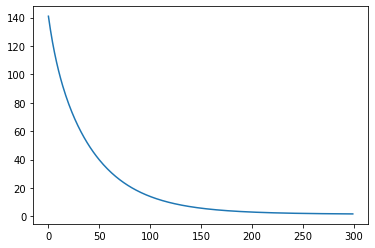

In [238]:
fig, ax = plt.subplots()
ax.plot(range(pol_reg.epochs), pol_reg.losses)

In [248]:
X_poly_test = poly_features.transform(X_test, extended=False)

In [250]:
X_poly_test = mean.transform(X_poly_test)

In [252]:
pol_reg.score(X_poly_test, y_test)

3.8680869724235567

In [271]:
pol_reg.fit(X_poly_train, y_train, alpha=0.01, lam=1, epochs=300)

5.458057404234026


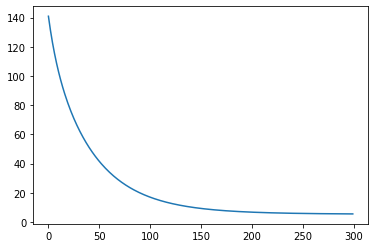

In [272]:
fig, ax = plt.subplots()
ax.plot(range(pol_reg.epochs), pol_reg.losses)

In [273]:
pol_reg.score(X_poly_test, y_test)

5.576400674750733

In [284]:
def learning_curve(model, X_train, y_train, X_val, y_val, alpha=0.001, lam=0, epochs=300):
    error_train = []
    error_val = []
    for m in range(1, X_train.shape[0]):
        error_train.append(model.fit(X_train[:m], y_train[:m ], alpha=alpha, lam=lam, epochs=epochs))
        error_val.append(model.score(X_test, y_test))
    return error_train
        

In [331]:
pol_reg.fit(X_poly_train[:1], y_train[:1], alpha=0.01, lam=0, epochs=300)

1.4982843786678156e-08

In [332]:
pol_reg.score(X_poly_test, y_test)

191.84991084151224

# 3 - Learning Curves

In [350]:
error_train=[]
error_test=[]
for m in range(1, X_poly_train.shape[0]):
    error_train.append(pol_reg.fit(X_poly_train[:m], y_train[:m], alpha=0.01, lam=0.01, epochs=300))
    error_test.append(pol_reg.score(X_poly_test, y_test))

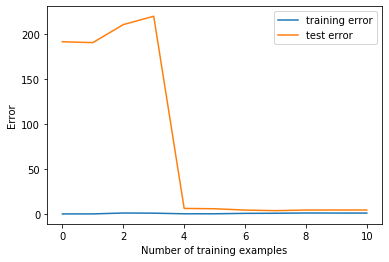

In [351]:
fig, ax = plt.subplots()
ax.plot(range(11), error_train, label='training error')
ax.plot(range(11), error_test, label='test error')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Error')
ax.legend()

In [339]:
error_test

[191.84991084151224,
 190.70508014461862,
 212.34999737424067,
 221.19001625100822,
 6.110419952700221,
 5.743362545871888,
 4.267859728823553,
 3.6136187324871227,
 4.2889152637064525,
 4.335956342186908,
 4.321981347039683]